<a href="https://colab.research.google.com/github/nesamathi/ml./blob/main/gold_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta


In [20]:

# 🟡 Step 1: Get gold data (past 2 years)
data = yf.download("GC=F", start="2023-01-01", end=datetime.today().strftime("%Y-%m-%d"))
data.reset_index(inplace=True)

/tmp/ipython-input-3651684610.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("GC=F", start="2023-01-01", end=datetime.today().strftime("%Y-%m-%d"))
[*********************100%***********************]  1 of 1 completed


In [21]:

# 🟡 Step 2: Get user input date
date_input = input("Enter date (YYYY-MM-DD): ")
date_input = pd.to_datetime(date_input)



Enter date (YYYY-MM-DD): 2025-01-06


In [22]:
# 🟡 Step 3: Find nearest available date
if date_input not in data["Date"].values:
    # If holiday/weekend → pick nearest trading day
    nearest = data[data["Date"] < date_input].iloc[-1]
    date_input = nearest["Date"]
    print(f"No data for entered date. Showing data for: {date_input.date()}")


In [23]:
# 🟡 Step 4: Extract info
row = data[data["Date"] == date_input].iloc[0]
print("\n📅 Date:", date_input.date())
print("💰 Price (Close):", round(row["Close"], 2))
print("🔼 High:", round(row["High"], 2))
print("🔽 Low:", round(row["Low"], 2))


📅 Date: 2025-01-06
💰 Price (Close): Ticker
GC=F    2638.399902
Name: 504, dtype: object
🔼 High: Ticker
GC=F    2647.0
Name: 504, dtype: object
🔽 Low: Ticker
GC=F    2617.300049
Name: 504, dtype: object


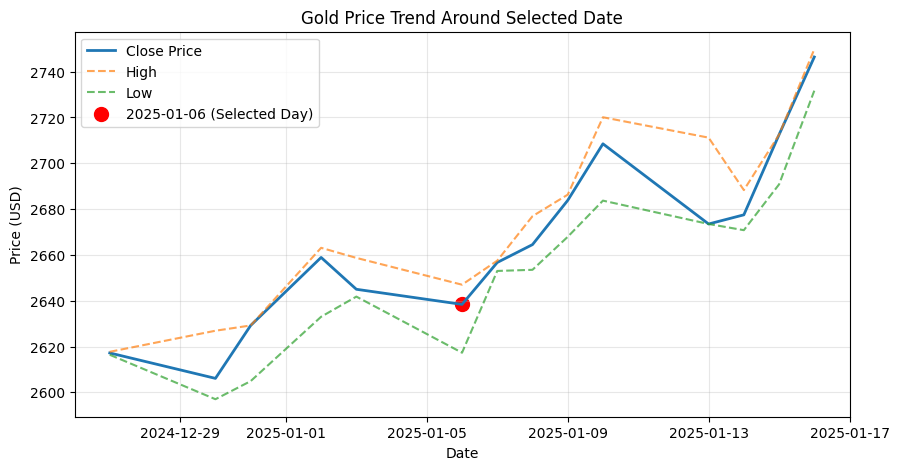

In [24]:
# 🟡 Step 5: Show graph (last 10 days)
window = data[(data["Date"] >= date_input - timedelta(days=10)) &
              (data["Date"] <= date_input + timedelta(days=10))]

plt.figure(figsize=(10,5))
plt.plot(window["Date"], window["Close"], label="Close Price", linewidth=2)
plt.plot(window["Date"], window["High"], '--', label="High", alpha=0.7)
plt.plot(window["Date"], window["Low"], '--', label="Low", alpha=0.7)
plt.scatter(date_input, row["Close"], color='red', s=100, label=f"{date_input.date()} (Selected Day)")
plt.title("Gold Price Trend Around Selected Date")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()